In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from cmb.planck_2018 import *
from cmb.spt3g_2018 import *
from cmb.CMB import Binner

/var/folders/dx/56r119096g71nr7d270292b80000gn/T/ipykernel_26739/2120347185.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<ErrorbarContainer object of 3 artists>

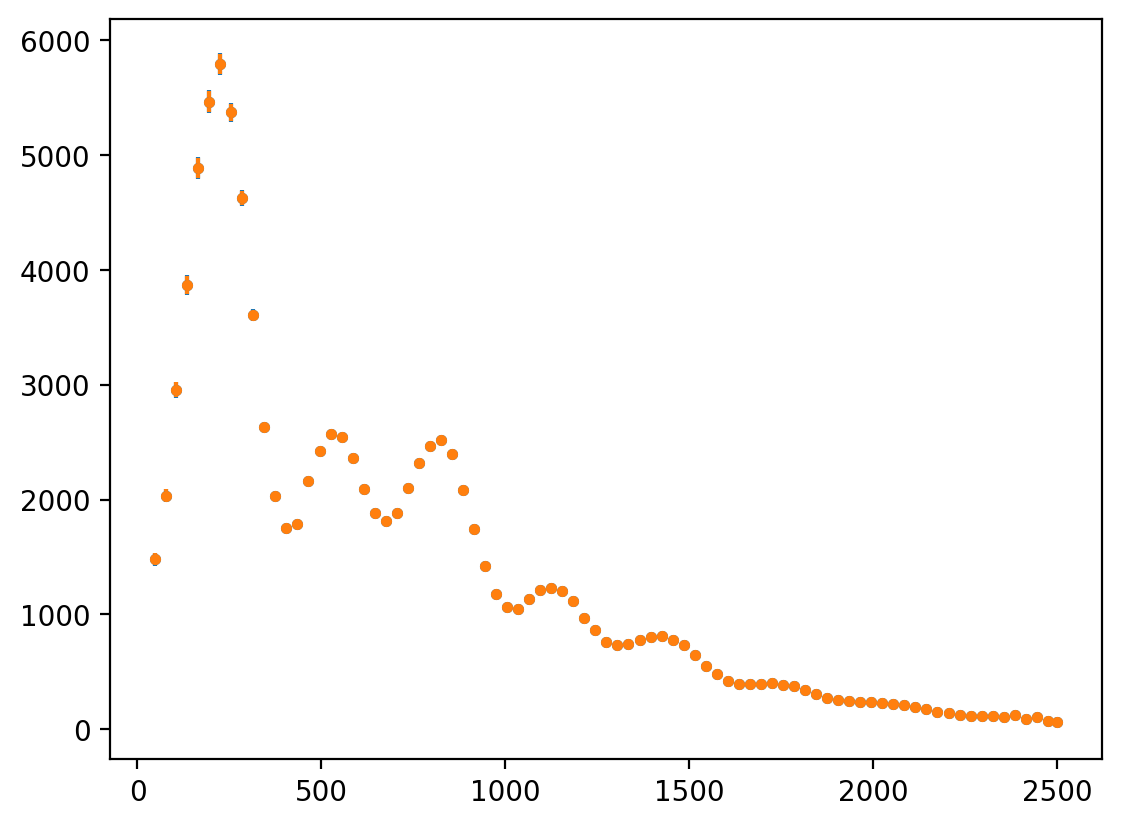

In [2]:
tt_path = "/Users/gabe/projects/recombination/data/planck/COM_PowerSpect_CMB-TT-binned_R3.01.txt"
te_path = "/Users/gabe/projects/recombination/data/planck/COM_PowerSpect_CMB-TE-binned_R3.03.txt"
ee_path = "/Users/gabe/projects/recombination/data/planck/COM_PowerSpect_CMB-EE-binned_R3.02.txt"
unbinned = "/Users/gabe/projects/recombination/data/planck/COM_PowerSpect_CMB-TT-full_R3.01.txt"

pl_un = Planck2018(unbinned)
pl_bn = Planck2018(tt_path)

start_stop_step = [(30, 99, 5), (100, 1503, 9), (1504, 2013, 17), (2014, 2508, 33)]

bin_edges = []
for start,stop,step in start_stop_step:
    bes = np.arange(start,stop+step, step=step)
    if len(bin_edges)==0:
        bin_edges.append(bes)
    else:
        a = np.delete(bes, 0)
        bin_edges.append(a)
bin_edges = np.hstack(bin_edges)

bin_edges = np.arange(30, 2508, step=30)
bin_edges = np.append(bin_edges, 2509)
B = Binner(bin_edges)

#print(pl_un.data)
my_pl_bn = B.bin_data(pl_un, weights="planck")


fig,ax = plt.subplots()

#pl_bn.to_dl()
#my_pl_bn.to_dl()

#ax.errorbar(pl_bn.data["ell"], pl_bn.data["Dl"], fmt=".")
ax.errorbar(my_pl_bn.ell(), my_pl_bn.Dl(), yerr=my_pl_bn.Dl_err(), fmt=".")
ax.errorbar(pl_bn.ell(), pl_bn.Dl(), yerr=pl_bn.Dl_err(), fmt=".")


In [3]:
import pickle as pkl
camb_file_name = "/Users/gabe/projects/recombination/data/camb_ultra_high_precision.pkl"
with open(camb_file_name, "rb") as f:
    camb_raw = pkl.load(f)

Tcmb = 2725500.0
muK2 = Tcmb**2
fid = {} #ultra precise
lmin = 2
lmax = 4000
camb_ells = np.arange(2, lmax+1)
fid["tt"] = camb_raw["total"][2:lmax+1,0]/(camb_ells*(camb_ells+1)/(2*np.pi))
fid["ee"] = camb_raw["total"][2:lmax+1,1]/(camb_ells*(camb_ells+1)/(2*np.pi))
fid["te"] = camb_raw["total"][2:lmax+1,3]/(camb_ells*(camb_ells+1)/(2*np.pi))
fid["pp"] = camb_raw["lens_potential"][2:lmax+1,0]/((camb_ells*(camb_ells+1))**2/(2*np.pi))

In [4]:
camb_tt = {"ell": camb_ells, "Cl":fid["tt"]}
camb_df = pd.DataFrame(camb_tt)
Tcmb = 2725500.0
camb_df.attrs = {"uK2": Tcmb**2}
camb = CMBPowerSpectrum(camb_df)

<ErrorbarContainer object of 3 artists>

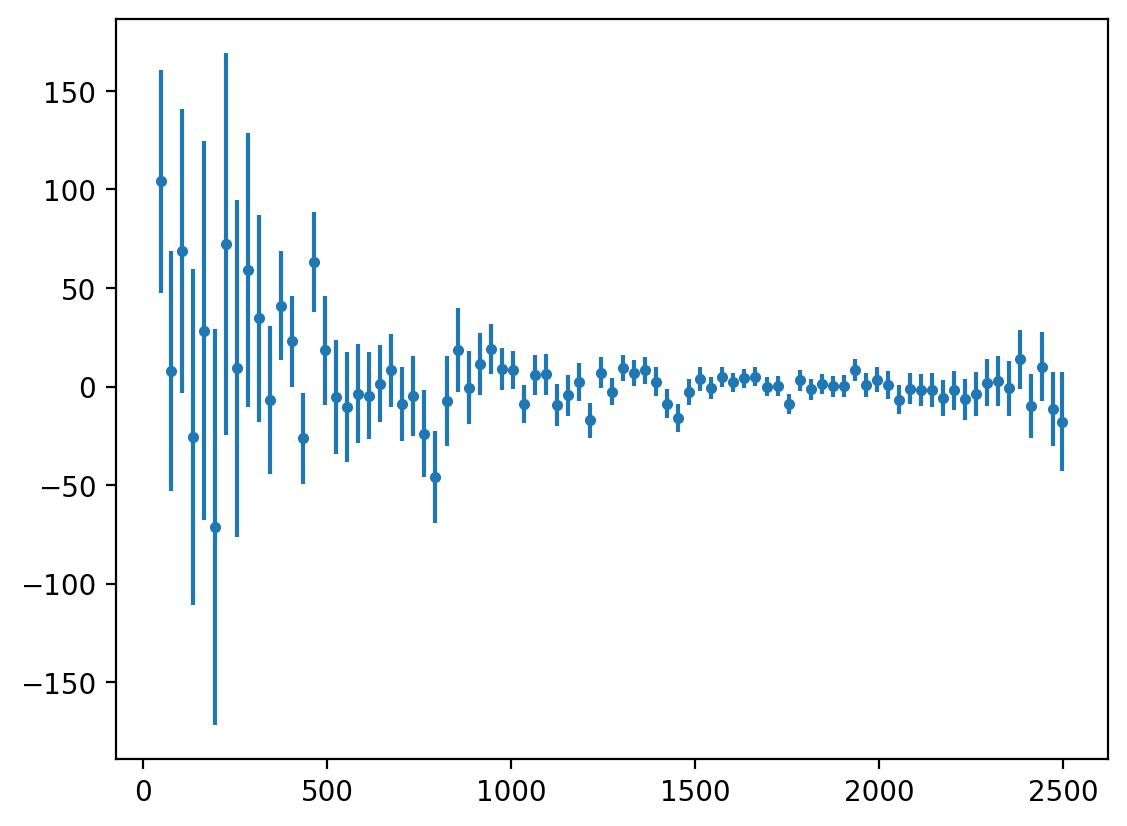

In [5]:
fig,ax = plt.subplots()

ax.errorbar(my_pl_bn.ell(), (my_pl_bn.Dl() - camb.Dl(my_pl_bn.ell())), yerr = my_pl_bn.Dl_err(), marker=".", ls="none")

In [6]:
tt_binned = planck_2018_highl_EE()
tt_unbinned = planck_2018_highl_TT_unbinned()

[  30   60   90  120  150  180  210  240  270  300  330  360  390  420
  450  480  510  540  570  600  630  660  690  720  750  780  810  840
  870  900  930  960  990 1020 1050 1080 1110 1140 1170 1200 1230 1260
 1290 1320 1350 1380 1410 1440 1470 1500 1530 1560 1590 1620 1650 1680
 1710 1740 1770 1800 1830 1860 1890 1920 1950 1980 2010 2040 2070 2100
 2130 2160 2190 2220 2250 2280 2310 2340 2370 2400 2430 2460 2490 2509]


<ErrorbarContainer object of 3 artists>

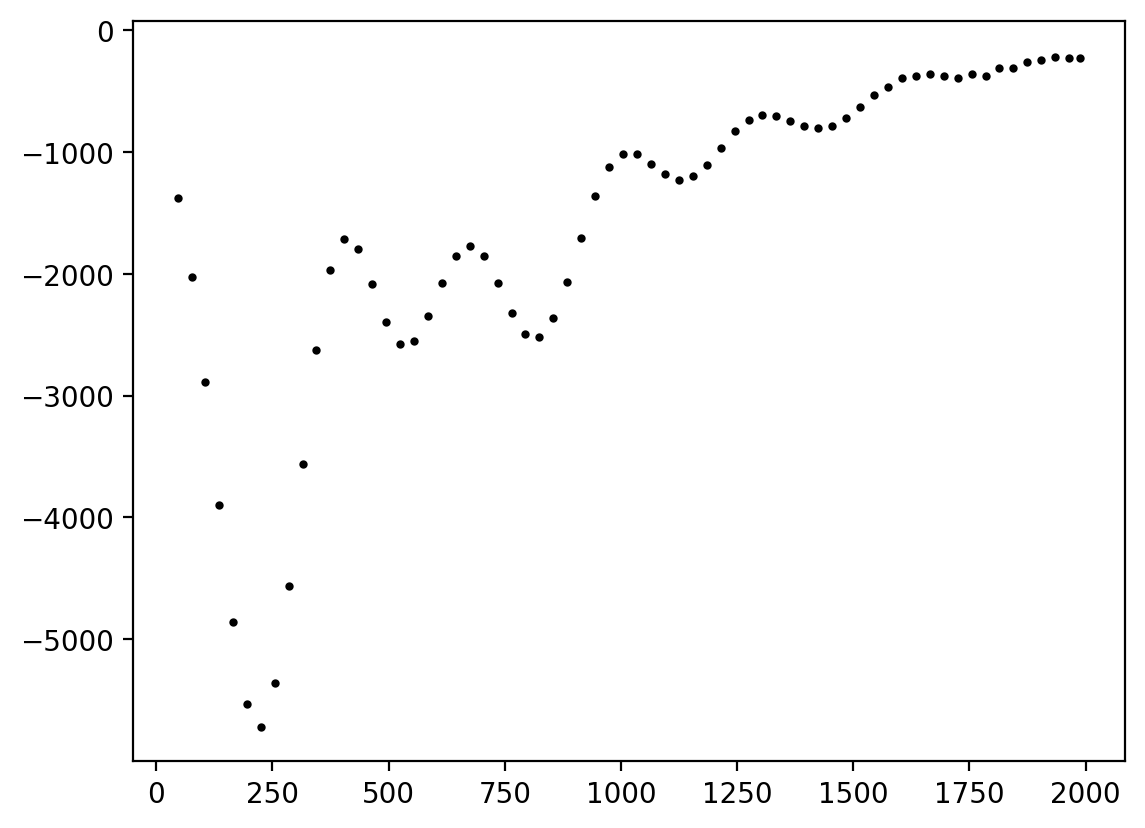

In [7]:
start_stop_step = [(30, 99, 5), (100, 1503, 9), (1504, 2013, 17), (2014, 2508, 33)]

bin_edges = []
for start,stop,step in start_stop_step:
    bes = np.arange(start,stop+step, step=step)
    if len(bin_edges)==0:
        bin_edges.append(bes)
    else:
        a = np.delete(bes, 0)
        bin_edges.append(a)
bin_edges = np.hstack(bin_edges)

bin_edges = np.arange(30, 2508, step=30)
bin_edges = np.append(bin_edges, 2509)
print(bin_edges)
B = Binner(bin_edges)

my_bn = B.bin_data(tt_unbinned, weights="planck")


fig,ax = plt.subplots()
ax.errorbar(tt_binned.ell(), tt_binned.Dl()-camb.Dl(tt_binned.ell()), yerr=tt_binned.Dl_err(), marker=".", ms="4", linestyle="none", color="black")
#ax.errorbar(my_bn.ell(), my_bn.Dl()-camb.Dl(my_bn.ell()), yerr=my_bn.Dl_err(), marker=".", ms="4", linestyle="none", color="red", alpha=.5)

[ 774.5051  824.5458  874.4668  924.5135  974.4886 1024.4469 1074.4856
 1124.4887 1174.4393 1224.4667 1274.4308 1324.4366 1374.4387 1424.4372
 1474.4441 1524.4723 1574.4701 1624.4347 1674.4951 1724.4171 1774.5026
 1824.4812 1874.4228 1924.5097 1974.481  2050.8052 2152.1731 2249.8849
 2350.3061 2451.0198 2550.1999 2649.3653 2750.1193 2850.2725 2946.7426]
[   2    3    4 ... 3998 3999 4000]


<ErrorbarContainer object of 3 artists>

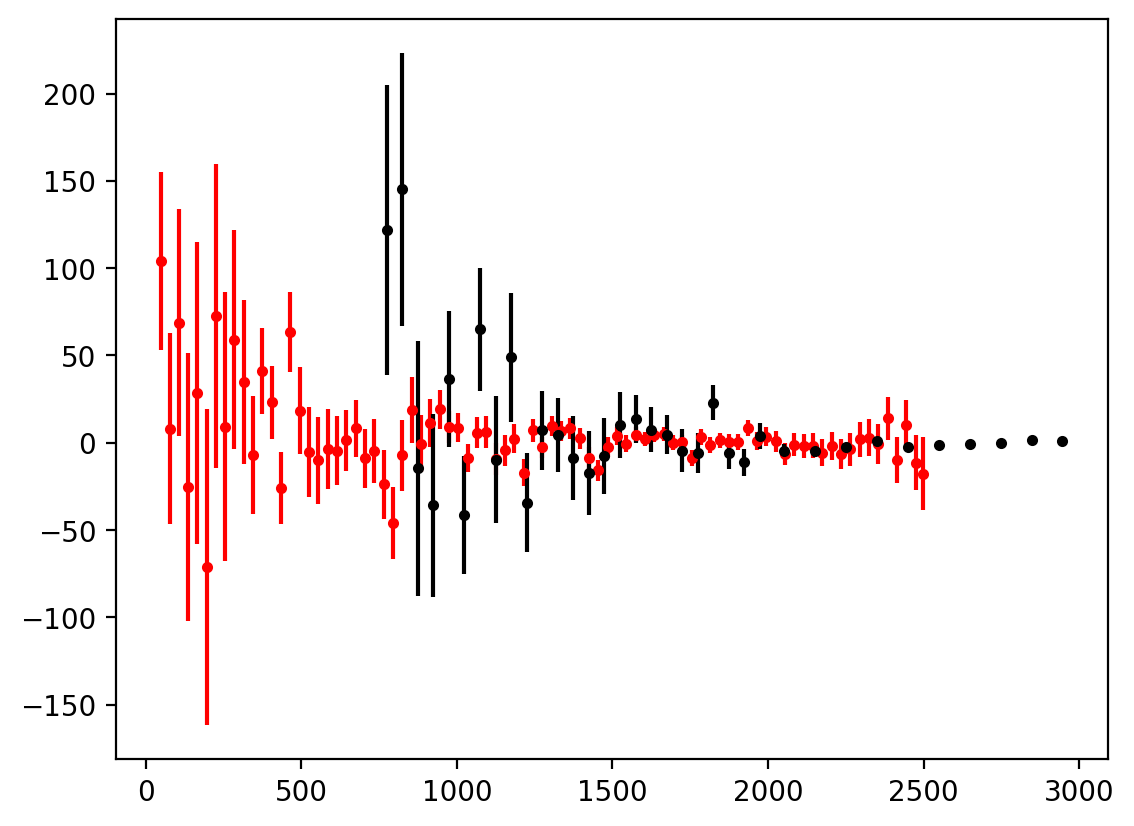

In [8]:
spt3g_tt = spt3g_2018_TT()
planck_tt = planck_2018_highl_TT()

fig,ax = plt.subplots()

ax.errorbar(planck_tt.ell(), (planck_tt.Dl()-camb.Dl(planck_tt.ell())), yerr=planck_tt.Dl_err(),  marker=".", ls="none", color="red")
print(spt3g_tt.ell())
print(camb.ell())
ax.errorbar(spt3g_tt.ell(), (spt3g_tt.Dl()-camb.Dl(spt3g_tt.ell())), yerr=spt3g_tt.Dl_err(), marker=".", ls="none", color="black")

In [9]:
planck_tt.bibtex()
spt3g_tt.bibtex()

@article{Planck:2018vyg,
        author = "Aghanim, N. and others",
        collaboration = "Planck",
        title = "{Planck 2018 results. VI. Cosmological parameters}",
        eprint = "1807.06209",
        archivePrefix = "arXiv",
        primaryClass = "astro-ph.CO",
        doi = "10.1051/0004-6361/201833910",
        journal = "Astron. Astrophys.",
        volume = "641",
        pages = "A6",
        year = "2020",
        note = "[Erratum: Astron.Astrophys. 652, C4 (2021)]"
        } 


Test
Test
